In [18]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [19]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [57]:
train["Cabin"].nunique()

147

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


<BarContainer object of 2 artists>

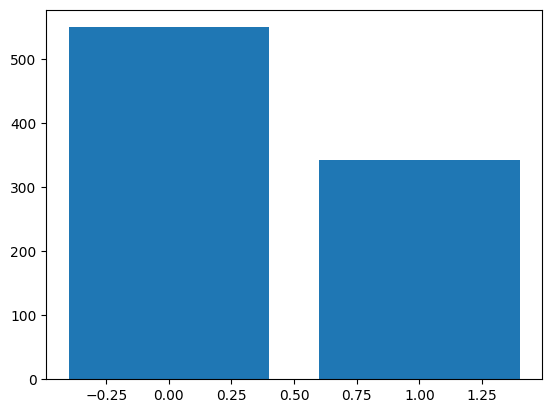

In [21]:
plt.bar(train["Survived"].value_counts().index,train["Survived"].value_counts().values)

<BarContainer object of 3 artists>

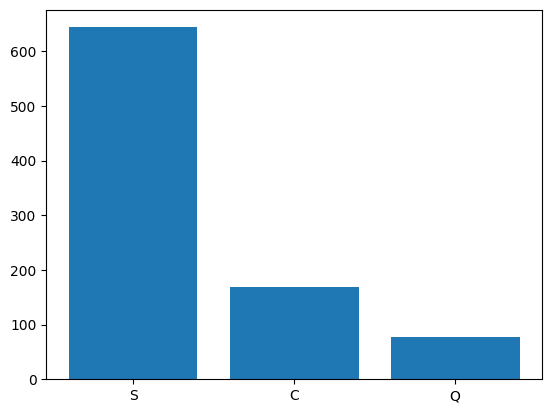

In [22]:
plt.bar(train["Embarked"].value_counts().index,train["Embarked"].value_counts().values)

<BarContainer object of 891 artists>

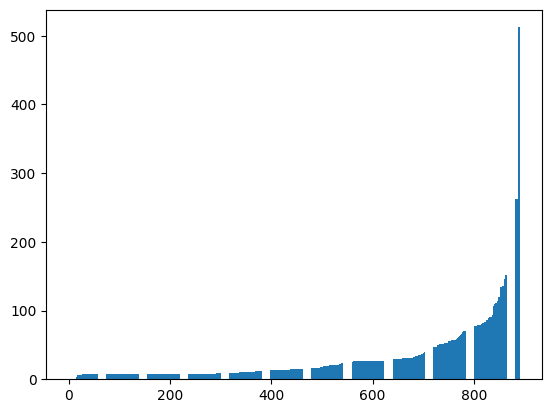

In [23]:
plt.bar(train["Fare"].index,train["Fare"].sort_values().values)


In [26]:
mean_age = train.Age.mean()
train.loc[train["Age"].isna()==1, "Age"] = mean_age
most_popular_embarked = train.Embarked.value_counts()
train.loc[train["Embarked"].isna()==1, "Embarked"] = most_popular_embarked[0]


C:\Users\Aleksey\AppData\Local\Temp\ipykernel_1148\4269965880.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train.loc[train["Embarked"].isna()==1, "Embarked"] = most_popular_embarked[0]


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(train["Name"])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [65]:
tfidf_df.shape

(891, 1509)

<Axes: >

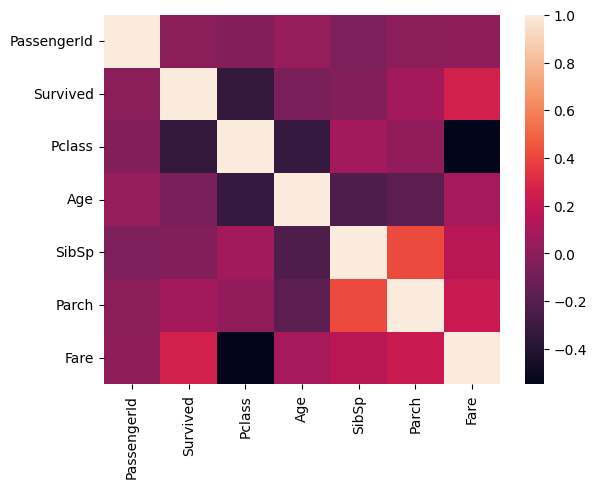

In [27]:
from category_encoders.one_hot import OneHotEncoder
from sklearn.preprocessing import StandardScaler

train_EDA = train.copy()
train_EDA = train_EDA.drop(columns=["Name","Ticket","Cabin"])
sns.heatmap(train_EDA[list(train_EDA.select_dtypes(exclude="object"))].corr())

In [ ]:
X_train = train.drop(columns=["Survived"])
Y_train = train["Survived"]

X_test = test

In [29]:
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from category_encoders.one_hot import OneHotEncoder
from sklearn.preprocessing import StandardScaler


X_train = X_train.drop(columns=["Name","Ticket","Cabin","Parch"])
cols_for_ohe = list(X_train.select_dtypes(include="object"))
num_cols = list(X_train.select_dtypes(exclude="object"))
cols_for_ohe_idx = [list(X_train.columns).index(col) for col in cols_for_ohe]
numeric_cols_idx = [list(X_train.columns).index(col) for col in num_cols]

t = [('OneHotEncoder', OneHotEncoder(), cols_for_ohe_idx),
        ('StandardScaler', StandardScaler(), numeric_cols_idx)]

col_transform = ColumnTransformer(transformers=t)



In [56]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score

pipe = Pipeline([("transformer",col_transform),
                 ("forest", RandomForestClassifier(n_estimators=100,max_depth=20))], verbose=True)
pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_train)
print(classification_report(Y_train, y_pred))
print(accuracy_score(Y_train, y_pred))


[Pipeline] ....... (step 1 of 2) Processing transformer, total=   0.0s
[Pipeline] ............ (step 2 of 2) Processing forest, total=   0.2s
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891

1.0


In [47]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score

pipe = Pipeline([("transformer",col_transform),
                 ("forest", CatBoostClassifier(iterations=1000, depth=10, learning_rate=0.002))], verbose=False)
pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_train)


0:	learn: 0.6915831	total: 7.18ms	remaining: 7.17s
1:	learn: 0.6905008	total: 9.13ms	remaining: 4.55s
2:	learn: 0.6890916	total: 20.6ms	remaining: 6.86s
3:	learn: 0.6878206	total: 22.2ms	remaining: 5.53s
4:	learn: 0.6866393	total: 23.6ms	remaining: 4.71s
5:	learn: 0.6856012	total: 25ms	remaining: 4.14s
6:	learn: 0.6842236	total: 36.6ms	remaining: 5.18s
7:	learn: 0.6830366	total: 38.7ms	remaining: 4.8s
8:	learn: 0.6815978	total: 45.4ms	remaining: 5s
9:	learn: 0.6803765	total: 47.3ms	remaining: 4.69s
10:	learn: 0.6790256	total: 49.9ms	remaining: 4.49s
11:	learn: 0.6777778	total: 52.8ms	remaining: 4.35s
12:	learn: 0.6763429	total: 60.3ms	remaining: 4.57s
13:	learn: 0.6749451	total: 62.9ms	remaining: 4.43s
14:	learn: 0.6735255	total: 74.7ms	remaining: 4.91s
15:	learn: 0.6728149	total: 75.9ms	remaining: 4.66s
16:	learn: 0.6715286	total: 78.5ms	remaining: 4.54s
17:	learn: 0.6701922	total: 81.3ms	remaining: 4.44s
18:	learn: 0.6690413	total: 83.5ms	remaining: 4.31s
19:	learn: 0.6677917	total: 

In [48]:
print(f1_score(Y_train, y_pred))
print(accuracy_score(Y_train, y_pred))


0.8370607028753994
0.8855218855218855


In [44]:
y_result = pipe.predict(X_test)
titanic_result = pd.concat([pd.DataFrame(X_test["PassengerId"])
           ,pd.DataFrame(y_result,columns=["Survived"])], axis=1)
titanic_result.set_index("PassengerId").to_csv("titanic_result.csv")